<a href="https://colab.research.google.com/github/DotBion/brain-fibers/blob/main/run_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from os.path import dirname, join as pjoin
import scipy.io as sio

In [3]:
import torch

In [4]:
from torch.utils.data import Dataset

In [5]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# data_dir = pjoin(dirname(sio.__file__), 'matlab', 'tests', 'data')
mat_fname = "/content/data_n100000_nf3_b1000b2000b3000_edge125_noiseless.mat"#pjoin(data_dir, 'testdouble_7.4_GLNX86.mat')

In [7]:
mat_fname = "/content/drive/MyDrive/data_n100000_nf3_b1000b2000b3000_edge125_noiseless.mat"

In [8]:
mat_contents = sio.loadmat(mat_fname, spmatrix=False)

In [9]:
# !pip install h5py

# import h5py
# import os

# mat_fname = "/content/data_n100000_nf2_b1000b2000b3000_edge125_noiseless.mat"

# # Check if the file exists
# if not os.path.exists(mat_fname):
#     print(f"Error: File not found at {mat_fname}")
# else:
#     try:
#         # Attempt to read using h5py (for MATLAB v7.3 files)
#         with h5py.File(mat_fname, 'r') as f:
#             print("Successfully opened with h5py. File might be a valid MATLAB v7.3 file.")
#             # You can inspect the contents, e.g., print keys
#             print("Keys in the file:", list(f.keys()))
#         # If h5py succeeds, try scipy.io.loadmat again
#         # mat_contents = sio.loadmat(mat_fname, spmatrix=False)
#         # print("Successfully loaded with scipy.io.loadmat after h5py check.")

#     except Exception as e:
#         print(f"Could not open with h5py. Error: {e}")
#         print("This could mean the file is corrupted, not a MATLAB v7.3 file, or in an older format.")
#         print("If it's an older format, the issue is likely corruption.")

In [10]:
mat_contents

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed May 21 11:26:03 2025',
 '__version__': '1.0',
 '__globals__': [],
 'F': array([[ 2.52212399,  0.25257685, -0.17632473, ..., -0.93974505,
          0.73219754, -0.21731491],
        [ 2.52212399,  0.31377339, -0.20708152, ..., -0.93195276,
          1.1898421 ,  0.08906574],
        [ 2.52212399,  0.19456473, -0.22254519, ..., -0.884662  ,
          0.73310509,  0.59302917],
        ...,
        [ 2.52212399,  0.35849052, -0.10983818, ..., -0.21505475,
         -0.91686062, -0.35860122],
        [ 2.52212399, -0.27035617,  0.35090651, ...,  1.16969234,
          0.23712446,  0.42442283],
        [ 2.52212399,  0.02424407, -0.09760866, ..., -0.43072812,
          1.22682487,  0.24455586]]),
 'b_table': array([[ 0.00000000e+00,  1.00602779e+03,  1.00602779e+03, ...,
          3.01808337e+03,  3.01808337e+03,  3.01808337e+03],
        [ 0.00000000e+00, -8.91291143e-01, -3.78301055e-01, ...,
         -4.29105854e-01,  

The array "b_table" holds the diffusion sampling scheme. The first row contains b-values. In this data set, the b-values are: 0, 1000, 2000, 3000. So, we have a 3-shell acquisition here (we don't count b=0 as a shell, because it is a variant without diffusion encoding, which is only used for weighting the signal). The remaining rows contain the x,y,z coordinates of the b-vectors (i.e. diffusion encoding directions). In total, there are 271 b-vectors (including b=0).

In [11]:
mat_contents['voxt']

array([[(array([[3]], dtype=uint8), array([[ 1.0935231 , -1.07125055],
               [ 1.78944789, -1.058382  ],
               [-0.46716807,  0.00282574]]), array([[0.        ],
               [0.5996192 ],
               [0.23949078],
               [0.16022759]]), array([[2.85993094],
               [1.25539032],
               [1.23940896],
               [1.52274997]]), array([[ 1.40303673e-01,  2.85993094e+00,  2.85993094e+00,
                 2.85993094e+00,  1.57079633e+00,  1.57079633e+00,
                 0.00000000e+00],
               [ 2.38720187e-01,  7.56965240e-01,  7.56965240e-01,
                 2.25224047e+00,  1.09352310e+00, -1.07125055e+00,
                 0.00000000e+00],
               [ 2.20513059e-01,  1.06466232e+00,  1.06466232e+00,
                 1.58890222e+00,  1.78944789e+00, -1.05838200e+00,
                 0.00000000e+00],
               [ 4.00463081e-01,  1.38066309e+00,  1.38066309e+00,
                 1.80692373e+00, -4.67168066e-01,  2.82573

In [12]:
mat_contents['b_table'].shape

(4, 271)

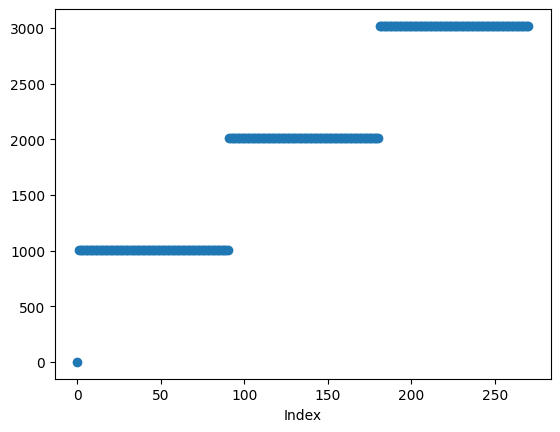

In [13]:
b_table = mat_contents['b_table']

b_values = b_table[0, :]

plt.plot(b_values, 'o')
plt.xlabel('Index')
plt.show()

In [14]:
mat_contents['b_table'][0].size

271

In [15]:
mat_contents['b_table'][1].size

271

In [16]:
mat_contents['odf_vertices'].shape #cartesian co-ord system

(3, 642)

In [17]:
mat_contents['b_table'][3].shape

(271,)

In [18]:
mat_contents['b_table'][0]

array([   0.        , 1006.02778932, 1006.02778932, 1006.02778932,
       1006.02778932, 1006.02778932, 1006.02778932, 1006.02778932,
       1006.02778932, 1006.02778932, 1006.02778932, 1006.02778932,
       1006.02778932, 1006.02778932, 1006.02778932, 1006.02778932,
       1006.02778932, 1006.02778932, 1006.02778932, 1006.02778932,
       1006.02778932, 1006.02778932, 1006.02778932, 1006.02778932,
       1006.02778932, 1006.02778932, 1006.02778932, 1006.02778932,
       1006.02778932, 1006.02778932, 1006.02778932, 1006.02778932,
       1006.02778932, 1006.02778932, 1006.02778932, 1006.02778932,
       1006.02778932, 1006.02778932, 1006.02778932, 1006.02778932,
       1006.02778932, 1006.02778932, 1006.02778932, 1006.02778932,
       1006.02778932, 1006.02778932, 1006.02778932, 1006.02778932,
       1006.02778932, 1006.02778932, 1006.02778932, 1006.02778932,
       1006.02778932, 1006.02778932, 1006.02778932, 1006.02778932,
       1006.02778932, 1006.02778932, 1006.02778932, 1006.02778

In [19]:
mat_contents['b_table'][0][1]

np.float64(1006.0277893195466)

In [20]:
mat_contents['b_table'][0][0]

np.float64(0.0)

The array "dwi" holds the synthetically generated diffusion-weighted signal. There are 100000 voxels, each sampled at 271 directions (defined above).

In [21]:
mat_contents['dwi']

array([[1.        , 0.38415341, 0.41852097, ..., 0.21986342, 0.31950491,
        0.08279145],
       [1.        , 0.39577771, 0.38460565, ..., 0.17950288, 0.09543498,
        0.06058017],
       [1.        , 0.48684794, 0.39555855, ..., 0.09485457, 0.05135589,
        0.28620099],
       ...,
       [1.        , 0.56734501, 0.32174614, ..., 0.19593223, 0.39076057,
        0.06062001],
       [1.        , 0.41409458, 0.38362504, ..., 0.08947313, 0.07683212,
        0.04533967],
       [1.        , 0.50899736, 0.31319543, ..., 0.02330286, 0.21763523,
        0.0196599 ]])

In [22]:
mat_contents['dwi'].shape

(100000, 271)

In [23]:
mat_contents['dwi'][0].shape #b-values 0,1000,2000,3000

(271,)

In [24]:
mat_contents['b_table'][0].shape

(271,)

In [25]:
#dwi for voxel0
mat_contents['dwi'][0]

array([1.        , 0.38415341, 0.41852097, 0.45597152, 0.3414545 ,
       0.43680769, 0.3689362 , 0.45986214, 0.37215814, 0.35187321,
       0.37135134, 0.36519813, 0.40544031, 0.42607136, 0.43090876,
       0.32027598, 0.29203503, 0.30737553, 0.37111139, 0.33683813,
       0.4050447 , 0.6331473 , 0.38545031, 0.51340839, 0.43225857,
       0.40956932, 0.30733609, 0.5254824 , 0.58471659, 0.3394533 ,
       0.63631439, 0.43134034, 0.46466661, 0.45847642, 0.36068722,
       0.37681831, 0.37433082, 0.39434111, 0.26508184, 0.65028691,
       0.2775233 , 0.37145232, 0.35822986, 0.67093254, 0.45253777,
       0.35388041, 0.46551998, 0.50284866, 0.50755748, 0.32390937,
       0.34347423, 0.268592  , 0.50372319, 0.34730856, 0.5427721 ,
       0.39495906, 0.47367685, 0.38115443, 0.42160134, 0.54910242,
       0.37988717, 0.32336453, 0.60520675, 0.36184371, 0.35326648,
       0.42224987, 0.5677903 , 0.34350049, 0.61230402, 0.42637513,
       0.3802961 , 0.47904603, 0.55435741, 0.37946452, 0.57264

The array "odf" holds the respective orientation distribution functions of the 100000 voxels. Mathematically, ODFs are defined on a sphere, but here we consider their discretized version. For this, we represent ODFs using a triangular parcellation of a sphere. There are 642 vertices spread uniformly on the unit sphere. You'll find their coordinates in the "odf_vertices" array. Each triangle of a parcellation is composed of odf_vertices whose indices are stored in "odf_faces". As Steven mentioned yesterday, ODFs are symmetrical, so we only store a half of the information – that's why "odf" has 642/2=321 columns.

In [26]:
mat_contents['odf'].shape

(100000, 321)

The last element that's important for now is the ground truth. You'll find it in the "voxt" array.

There's a lot of information there, but for now only two columns will matter:
ndir – number of directions in a given voxel (I gave you .mat files with 1 or 2 fibers and .mat files with 1, 2, or 3 fibers).
directions – spherical coordinates of the fiber directions;

In [27]:
mat_contents['voxt'].shape

(1, 100000)

In [28]:
mat_contents['voxt']['ndir']

array([[array([[3]], dtype=uint8), array([[1]], dtype=uint8),
        array([[2]], dtype=uint8), ..., array([[1]], dtype=uint8),
        array([[2]], dtype=uint8), array([[2]], dtype=uint8)]],
      dtype=object)

In [29]:
mat_contents['voxt']['ndir'].shape

(1, 100000)

In [30]:
mat_contents['voxt']['directions']

array([[array([[ 1.0935231 , -1.07125055],
               [ 1.78944789, -1.058382  ],
               [-0.46716807,  0.00282574]]),
        array([[-2.70267893, -0.82551973]]),
        array([[-1.28464016,  0.10745115],
               [ 0.81344624,  0.65990955]]), ...,
        array([[-0.60292788,  1.34531679]]),
        array([[ 0.17639295, -0.12491789],
               [ 1.9293584 , -0.06079207]]),
        array([[ 2.40003816,  0.29089578],
               [ 1.91539391, -0.09578257]])]], dtype=object)

In [31]:
mat_contents['voxt']['directions'].shape

(1, 100000)

In [32]:
mat_contents['voxt']['directions'][0].shape

(100000,)

In [33]:
mat_contents['voxt']['directions'][0][1] #actual dirn of that voxel

array([[-2.70267893, -0.82551973]])

In [34]:
mat_contents['voxt']['directions'][0][1][0] #actual dirn of that voxel

array([-2.70267893, -0.82551973])

In [35]:
az = mat_contents['voxt']['directions'][0][1][0][0] #az #actual dirn of that voxel

In [36]:
el = mat_contents['voxt']['directions'][0][1][0][1] #el

In [37]:
print(az,el)

-2.702678926300885 -0.8255197339091209


In [38]:
#az,el,R @matlab-spherical

In [39]:
from math import cos, sin
#convert this to cartesian
x = cos(el)*cos(az)
y = cos(el)*sin(az)
z = sin(el)
x,y,z

(-0.6138934741837855, -0.28819485571187514, -0.7349003520857595)

In [40]:
# check if this co-ord exists ? not required bkz we the predicted direction. may
# not be one of the sample direction ? %%

In [41]:
odf_vertices = mat_contents['odf_vertices']

In [42]:
vertices = odf_vertices.T  # shape: (N_directions, 3)


In [43]:
class ODFDataset(torch.utils.data.Dataset):
    def __init__(self, odf, odf_vertices, labels):
        self.odf = odf
        self.vertices = odf_vertices.T
        self.labels = labels

    def __len__(self):
        return len(self.odf)

    def __getitem__(self, idx):
        return {
            'features': self.odf[idx],            # shape: (N_directions,)
            'coords': self.vertices,              # shape: (N_directions, 3)
            'label': self.labels[idx]             # shape: (N_targets, 3) or class index
        }


In [44]:
odf = mat_contents['odf']
odf_vertices = mat_contents['odf_vertices']
voxt = mat_contents['voxt']

In [45]:
dataset = ODFDataset(odf, odf_vertices, voxt)
sample = dataset[0]

print("Input shape:", sample['features'].shape)  # e.g. (724,)
print("Coords shape:", sample['coords'].shape)   # (724, 3)
print("Label shape:", sample['label'].shape)     # (2, 3)

Input shape: (321,)
Coords shape: (642, 3)
Label shape: (100000,)


In [46]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SphericalTransformerBlock(nn.Module):
    def __init__(self, dim, heads=4):
        super().__init__()
        self.attn = nn.MultiheadAttention(embed_dim=dim, num_heads=heads, batch_first=True)
        self.ff = nn.Sequential(
            nn.LayerNorm(dim),
            nn.Linear(dim, dim),
            nn.GELU(),
            nn.Linear(dim, dim)
        )

    def forward(self, x):
        # x: (B, N_dirs, dim)
        attn_out, _ = self.attn(x, x, x)
        x = x + attn_out
        x = x + self.ff(x)
        return x

In [47]:
class ODFSphericalTransformer(nn.Module):
    def __init__(self, in_channels, hidden_dim=64, num_layers=3, max_fibers=2):
        super().__init__()
        self.input_proj = nn.Linear(1, hidden_dim)

        self.encoder = nn.Sequential(*[
            SphericalTransformerBlock(hidden_dim) for _ in range(num_layers)
        ])

        self.pool = nn.AdaptiveAvgPool1d(1)  # global pooling over directions
        self.predictor = nn.Linear(hidden_dim, max_fibers * 3)  # 2 fibers x 3D

    def forward(self, features):  # (B, N_dirs)
        B, N = features.shape
        x = features.view(B, N, 1)
        x = self.input_proj(x)  # (B, N, hidden_dim)
        x = self.encoder(x)     # (B, N, hidden_dim)
        x = x.transpose(1, 2)   # for pooling (B, hidden_dim, N)
        x = self.pool(x).squeeze(-1)  # (B, hidden_dim)
        out = self.predictor(x).view(B, -1, 3)  # (B, max_fibers, 3)
        return F.normalize(out, dim=-1)         # unit vector


In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_odf_sphere(odf, vertices, fibers=None):
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Normalize vertices by odf value
    scaled = vertices * odf[:, None]  # (N_dirs, 3)
    ax.scatter(scaled[:, 0], scaled[:, 1], scaled[:, 2], c=odf, cmap='viridis', s=10)

    # Plot ground truth fiber directions (if any)
    if fibers is not None:
        for vec in fibers:
            ax.quiver(0, 0, 0, vec[0], vec[1], vec[2], color='r', length=1.0, linewidth=2)

    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_zlim([-2, 2])
    ax.set_box_aspect([1,1,1])
    plt.show()

IndexError: index 1 is out of bounds for axis 0 with size 1

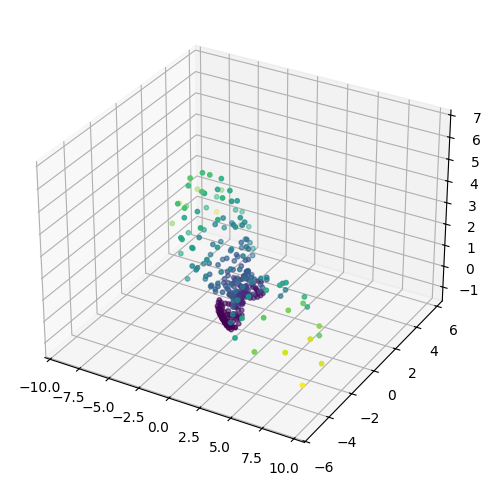

In [49]:
i = 0  # voxel index
#plot_odf_sphere(odf[i], odf_vertices.T, fibers=voxt[i][1])
plot_odf_sphere(odf[i], odf_vertices.T[:321], fibers=voxt[i][1])


In [ ]:
def cartesian_to_spherical_coords(vertices):
    x, y, z = vertices[:, 0], vertices[:, 1], vertices[:, 2]
    r = np.linalg.norm(vertices, axis=1)
    lat = np.arcsin(z / r) * 180 / np.pi  # latitude: -90 to +90
    lon = np.arctan2(y, x) * 180 / np.pi  # longitude: -180 to +180
    return lon, lat


In [ ]:
pip install cartopy


In [ ]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# Get data
odf_values = odf_row  # shape (321,)
vertices_half = odf_vertices[:321].T  # shape (321, 3)
lon, lat = cartesian_to_spherical_coords(vertices_half)

# Plot
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.KavrayskiyVII())
ax.coastlines()
sc = ax.scatter(lon, lat, c=odf_values, cmap='inferno', s=40,
                transform=ccrs.PlateCarree())
plt.colorbar(sc, orientation='horizontal', label='ODF Intensity')
ax.set_title("ODF Intensity at Sphere Vertices (Kavrayskiy VII Projection)")
plt.show()


In [ ]:
# Re-define the simulated odf_row and odf_vertices_half for plotting
import numpy as np
import matplotlib.pyplot as plt

# Simulated ODF data and vertices (321 directions)
np.random.seed(0)
odf_row = np.random.rand(321)
odf_vertices_half = np.random.randn(3, 642)[:, :321].T  # shape (321, 3)

# Function to convert Cartesian to spherical coordinates (lat/lon)
def cartesian_to_spherical_coords(vertices):
    x, y, z = vertices[:, 0], vertices[:, 1], vertices[:, 2]
    r = np.linalg.norm(vertices, axis=1)
    lat = np.arcsin(z / r) * 180 / np.pi  # latitude in degrees
    lon = np.arctan2(y, x) * 180 / np.pi  # longitude in degrees
    return lon, lat

# Convert and plot as fallback equirectangular heatmap
lon, lat = cartesian_to_spherical_coords(odf_vertices_half)

plt.figure(figsize=(10, 5))
plt.scatter(lon, lat, c=odf_row, cmap='inferno', s=50)
plt.colorbar(label='ODF Intensity')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("ODF Heatmap (Equirectangular Projection)")
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate ODF vertices and intensity values
np.random.seed(0)
odf_row = np.random.rand(321)
odf_vertices_half = np.random.randn(3, 642)[:, :321].T  # shape: (321, 3)

# Normalize to unit vectors (just in case)
odf_vertices_half = odf_vertices_half / np.linalg.norm(odf_vertices_half, axis=1, keepdims=True)

# Stereographic projection (from south pole)
x, y, z = odf_vertices_half[:, 0], odf_vertices_half[:, 1], odf_vertices_half[:, 2]
X = x / (1 + z)
Y = y / (1 + z)

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(X, Y, c=odf_row, cmap='plasma', s=50)
plt.colorbar(label='ODF Intensity')
plt.title('ODF Stereographic Projection (from South Pole)')
plt.axis('equal')
plt.grid(True)
plt.xlabel('Stereographic X')
plt.ylabel('Stereographic Y')
plt.show()


In [ ]:
def calculate_angular_precision(predicted_directions, ground_truth_directions):
    """
    Calculates the angular error between predicted and ground truth directions.

    Args:
        predicted_directions (np.ndarray): Array of predicted directions (N_pred, 3).
                                          Assumes these are unit vectors.
        ground_truth_directions (np.ndarray): Array of ground truth directions (N_gt, 3).
                                            Assumes these are unit vectors.

    Returns:
        np.ndarray: Array of minimum angular errors for each predicted direction
                    compared to all ground truth directions (N_pred,).
                    Returns None if no ground truth directions are available.
    """
    if ground_truth_directions is None or ground_truth_directions.shape[0] == 0:
        return None # Cannot calculate precision if there are no ground truth directions

    # Ensure directions are unit vectors (should already be the case if normalized)
    predicted_directions = predicted_directions / np.linalg.norm(predicted_directions, axis=1, keepdims=True)
    ground_truth_directions = ground_truth_directions / np.linalg.norm(ground_truth_directions, axis=1, keepdims=True)

    # Calculate the absolute dot product between each predicted vector and each ground truth vector
    # Using abs because fiber directions are antipodal (v is equivalent to -v)
    dot_products = np.abs(np.dot(predicted_directions, ground_truth_directions.T)) # (N_pred, N_gt)

    # Clip values to avoid floating point errors issues with arccos
    dot_products = np.clip(dot_products, -1.0, 1.0)

    # Calculate the angle in radians
    angles_rad = np.arccos(dot_products) # (N_pred, N_gt)

    # Convert to degrees
    angles_deg = np.degrees(angles_rad) # (N_pred, N_gt)

    # The angular error for a predicted direction is the minimum angle to any ground truth direction
    min_angular_errors = np.min(angles_deg, axis=1) # (N_pred,)

    return min_angular_errors

def calculate_angular_dispersion(directions):
    """
    Calculates the angular dispersion (kappa or mean resultant length R)
    of a set of directions using the Watson distribution approach.
    A common measure is the mean resultant length (R).

    R = ||sum(directions)|| / N

    Kappa (concentration parameter) is often estimated from R, but R itself
    is a direct measure of dispersion (R=1 is no dispersion, R=0 is maximum).
    Higher R means lower dispersion (higher concentration).

    Args:
        directions (np.ndarray): Array of directions (N, 3). Assumes these are unit vectors.

    Returns:
        float: The mean resultant length (R). Returns NaN if no directions are provided.
    """
    if directions is None or directions.shape[0] == 0:
        return np.nan # Cannot calculate dispersion if no directions

    # Ensure directions are unit vectors (should already be the case if normalized)
    directions = directions / np.linalg.norm(directions, axis=1, keepdims=True)

    # Calculate the sum of the vectors
    sum_vectors = np.sum(directions, axis=0)

    # Calculate the mean resultant length (R)
    R = np.linalg.norm(sum_vectors) / directions.shape[0]

    return R

# Example Usage:
# Let's assume you have some predicted directions and ground truth directions
# from your model output or the voxt data.

# Simulate some predicted directions (e.g., from your model output)
# Ensure these are normalized unit vectors
simulated_predicted_directions = np.array([
    [1.0, 0.0, 0.1],  # Slightly off x-axis
    [0.0, 1.0, -0.2], # Slightly off y-axis
])
simulated_predicted_directions = simulated_predicted_directions / np.linalg.norm(simulated_predicted_directions, axis=1, keepdims=True)

# Get the ground truth directions for a specific voxel (e.g., voxel 0)
# Ensure these are normalized unit vectors
# The voxt['directions'] are already unit vectors
ground_truth_directions_voxel_0 = voxt[0]['directions']

# Calculate Angular Precision for the simulated predictions against the ground truth for voxel 0
angular_errors = calculate_angular_precision(simulated_predicted_directions, ground_truth_directions_voxel_0)

if angular_errors is not None:
    print(f"Angular errors (degrees) for simulated predictions vs voxel 0 ground truth: {angular_errors}")
    print(f"Mean Angular Precision (mean error): {np.mean(angular_errors):.2f} degrees")
else:
    print("Could not calculate angular precision: No ground truth directions available.")


# Calculate Angular Dispersion for the ground truth directions of voxel 0
dispersion_r_voxel_0 = calculate_angular_dispersion(ground_truth_directions_voxel_0)

if not np.isnan(dispersion_r_voxel_0):
    print(f"Angular Dispersion (Mean Resultant Length R) for voxel 0 ground truth: {dispersion_r_voxel_0:.4f}")
    # Interpretation: R close to 1 means the directions are tightly clustered
    # R close to 0 means they are widely dispersed
else:
    print("Could not calculate angular dispersion: No directions available.")


# Example with simulated dispersed directions
simulated_dispersed_directions = np.array([
    [1.0, 0.0, 0.0],
    [-1.0, 0.0, 0.0],
    [0.0, 1.0, 0.0],
    [0.0, -1.0, 0.0],
    [0.0, 0.0, 1.0],
    [0.0, 0.0, -1.0],
])
simulated_dispersed_directions = simulated_dispersed_directions / np.linalg.norm(simulated_dispersed_directions, axis=1, keepdims=True)

dispersion_r_dispersed = calculate_angular_dispersion(simulated_dispersed_directions)
print(f"Angular Dispersion (R) for simulated dispersed directions: {dispersion_r_dispersed:.4f}") # Should be close to 0

# Example with simulated tightly clustered directions
simulated_clustered_directions = np.array([
    [1.0, 0.1, 0.1],
    [1.0, -0.1, 0.1],
    [1.0, 0.1, -0.1],
    [1.0, -0.1, -0.1],
])
simulated_clustered_directions = simulated_clustered_directions / np.linalg.norm(simulated_clustered_directions, axis=1, keepdims=True)

dispersion_r_clustered = calculate_angular_dispersion(simulated_clustered_directions)
print(f"Angular Dispersion (R) for simulated clustered directions: {dispersion_r_clustered:.4f}") # Should be close to 1


In [ ]:
# Assuming the ODFDataset and ODFSphericalTransformer classes are defined above

# Prepare data for PyTorch
# The labels from voxt are structured arrays; we need to extract and format them.
# Each entry in voxt['directions'] is a numpy array of shape (N_fibers, 3).
# We need to handle varying numbers of fibers.
# A simple approach for training is to predict a fixed number of directions
# (e.g., the maximum number of fibers expected, like 2 or 3 based on the data)
# and use a loss function that accounts for the varying number of ground truth fibers.

# For this example, let's assume we want to predict up to 2 fibers.
# We'll create labels of shape (N_samples, max_fibers, 3).
# For samples with fewer than max_fibers, we can pad with zero vectors or NaNs,
# and modify the loss function to ignore these padded entries.

max_fibers = 3 # Based on your data description (n100000_nf3)

# Extract and format labels
# The 'directions' field is an array of arrays, so np.stack won't work directly.
# We'll iterate and pad.
formatted_labels = []
for i in range(len(voxt)):
    gt_dirs = voxt[i]['directions'] # shape (N_actual_fibers, 3)
    num_actual_fibers = gt_dirs.shape[0]

    # Create a padded array for this voxel
    padded_dirs = np.zeros((max_fibers, 3), dtype=np.float32)
    if num_actual_fibers > 0:
        # Copy the actual directions into the padded array
        # Take min to handle cases where data might have more fibers than max_fibers
        copy_count = min(num_actual_fibers, max_fibers)
        padded_dirs[:copy_count, :] = gt_dirs[:copy_count, :]

    formatted_labels.append(padded_dirs)

formatted_labels = np.stack(formatted_labels) # shape (N_samples, max_fibers, 3)

# Re-create the dataset with formatted labels
dataset = ODFDataset(odf.astype(np.float32), odf_vertices.astype(np.float32), formatted_labels)


# Split data (optional but good practice)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Create DataLoaders
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Define the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ODFSphericalTransformer(in_channels=1, hidden_dim=128, num_layers=4, max_fibers=max_fibers).to(device) # Increased dim and layers

# Define Loss Function and Optimizer
# We need a custom loss that handles the fact that our padded labels have zeros
# for non-existent fibers and that fiber directions are antipodal (v is equivalent to -v).
# A common approach is to use the cosine similarity between the predicted and ground truth
# directions, taking the maximum of cos(theta) and cos(theta - pi) (which is -cos(theta)).
# We only calculate loss for ground truth directions that are not zero vectors.

def fiber_direction_loss(predicted, target):
    """
    Calculates a custom loss for fiber direction prediction.
    Uses cosine similarity, accounts for antipodal nature and padding.

    Args:
        predicted (torch.Tensor): Predicted directions (B, max_fibers, 3). Should be normalized.
        target (torch.Tensor): Ground truth directions (B, max_fibers, 3).

    Returns:
        torch.Tensor: Scalar loss value.
    """
    # Ensure predictions are normalized (model output should handle this)
    predicted = F.normalize(predicted, dim=-1)

    # Reshape for easier comparison
    B, N_pred, _ = predicted.shape
    N_target = target.shape[1] # should be the same as N_pred (max_fibers)

    # Flatten for comparison (B, N_pred * 3) vs (B, N_target * 3)
    predicted_flat = predicted.view(B, N_pred * 3)
    target_flat = target.view(B, N_target * 3)

    loss = 0.0
    num_active_fibers = 0

    # Iterate through each sample in the batch
    for i in range(B):
        pred_i = predicted[i] # (max_fibers, 3)
        target_i = target[i] # (max_fibers, 3)

        # Find the actual ground truth directions for this sample
        # A simple check: a non-zero norm indicates an active fiber
        active_gt_mask = torch.linalg.norm(target_i, dim=-1) > 1e-6 # (max_fibers,)
        active_gt_dirs = target_i[active_gt_mask] # (N_actual_fibers, 3)

        if active_gt_dirs.shape[0] == 0:
            # No ground truth fibers for this voxel, skip loss calculation
            continue

        num_actual_fibers = active_gt_dirs.shape[0]
        num_active_fibers += num_actual_fibers

        # For each predicted direction, find the best match among ground truth directions
        # using antipodal cosine similarity.
        # We need to match predicted directions to ground truth directions.
        # This is a form of matching problem.
        # A simplified approach is to compute a similarity matrix and take the max.
        # However, for training, a more robust approach might involve matching.
        # A common loss for this type of problem is based on minimizing the angle
        # between predicted and *some* ground truth direction.

        # Let's simplify: for each *ground truth* direction, find the best matching *predicted* direction
        # and minimize the angle. This is asymmetric but can work.
        # Alternatively, for each *predicted* direction, find the best *ground truth* direction.

        # Let's try matching predicted to ground truth
        similarity_matrix = torch.matmul(predicted[i], active_gt_dirs.T) # (max_fibers, N_actual_fibers)
        # Account for antipodal symmetry: take the absolute value of the dot product
        similarity_matrix = torch.abs(similarity_matrix)

        # For each predicted fiber, find its best ground truth match's similarity
        # The best match has the highest absolute cosine similarity (smallest angle)
        best_similarity_for_each_pred = torch.max(similarity_matrix, dim=1)[0] # (max_fibers,)

        # We want the cosine similarity to be close to 1 for the matched pairs.
        # Loss can be 1 - best_similarity.
        # However, predicted directions that don't correspond to a ground truth fiber
        # should ideally have low similarity to all ground truth fibers.
        # This simple max approach doesn't directly penalize spurious predictions.

        # A better approach might involve Hungarian algorithm for matching,
        # but that's more complex.

        # Let's try another common approach: Sum of minimum angles between predicted
        # and ground truth directions.
        # For each predicted direction, find minimum angle to *any* ground truth direction.
        # For each ground truth direction, find minimum angle to *any* predicted direction.
        # Combine these.

        # Loss based on minimizing angle between predicted and target
        # cosine_sim = torch.einsum('ik,jk->ij', predicted[i], active_gt_dirs) # (max_fibers, N_actual_fibers)
        # # Account for antipodal symmetry
        # cosine_sim = torch.abs(cosine_sim)
        #
        # # Angle in radians (clipping for stability)
        # angles_rad = torch.arccos(torch.clamp(cosine_sim, -1.0 + 1e-6, 1.0 - 1e-6)) # (max_fibers, N_actual_fibers)
        #
        # # For each predicted fiber, find the minimum angle to any ground truth fiber
        # min_angles_pred_to_gt = torch.min(angles_rad, dim=1)[0] # (max_fibers,)
        #
        # # Consider predicted fibers that don't match well? This is tricky with fixed prediction count.
        # # If a predicted fiber is far from all ground truth fibers, its min_angle will be large.
        # # This loss implicitly encourages predicted fibers to align with ground truth ones.
        #
        # # Sum up the minimum angles for predicted fibers that are 'close' to a GT fiber?
        # # Or just sum all? Summing all might penalize predicting more fibers than exist.
        #
        # # Let's try a simpler average minimum angle over the predicted fibers.
        # # This doesn't handle the number of predicted fibers matching the number of GT fibers well.

        # Revisiting the initial idea: Maximize absolute dot product.
        # For each ground truth fiber, find the predicted fiber with the largest absolute dot product.
        # Average these largest dot products. Maximize this average (or minimize 1 - average).

        if num_actual_fibers > N_pred:
            print(f"Warning: Ground truth has {num_actual_fibers} fibers, model predicts max {N_pred}. Some GT fibers will not be matched.")

        # For each ACTUAL ground truth fiber, find the predicted fiber with the best (highest absolute) similarity
        similarity_gt_to_pred = torch.matmul(active_gt_dirs, predicted[i].T) # (N_actual_fibers, max_fibers)
        similarity_gt_to_pred = torch.abs(similarity_gt_to_pred)

        # For each ground truth fiber, find the maximum similarity to any predicted fiber
        best_similarity_for_each_gt = torch.max(similarity_gt_to_pred, dim=1)[0] # (N_actual_fibers,)

        # We want this similarity to be close to 1 for *all* actual ground truth fibers.
        # The loss is the average difference from 1 for these fibers.
        sample_loss = torch.mean(1.0 - best_similarity_for_each_gt)

        loss += sample_loss

    if num_active_fibers == 0:
         return torch.tensor(0.0, device=predicted.device) # Avoid division by zero

    # Average loss over samples that had ground truth fibers
    # Need to count how many samples had at least one GT fiber
    num_samples_with_gt = torch.sum(torch.linalg.norm(target.view(B, -1), dim=-1) > 1e-6).item() # Count samples with any non-zero entry
    if num_samples_with_gt == 0:
         return torch.tensor(0.0, device=predicted.device)


    # return loss / num_samples_with_gt # Average loss per sample with GT
    return loss / B # Average loss per batch entry (including those with no GT, where loss was 0)


# Let's refine the loss function
def custom_fiber_loss(predicted, target, reduction='mean'):
    """
    Calculates a loss that encourages predicted directions to align with ground truth.
    Handles padding and antipodal symmetry.

    Args:
        predicted (torch.Tensor): Predicted directions (B, N_pred, 3). Must be normalized.
        target (torch.Tensor): Ground truth directions (B, N_target, 3).
        reduction (str): Specifies the reduction to apply to the output:
                         'none' | 'mean' | 'sum'.

    Returns:
        torch.Tensor: Loss value.
    """
    B, N_pred, _ = predicted.shape
    N_target = target.shape[1]

    if N_pred != N_target:
        raise ValueError(f"Predicted fibers ({N_pred}) and target fibers ({N_target}) mismatch.")

    # Ensure predictions are normalized
    predicted = F.normalize(predicted, dim=-1)

    losses = []

    # Iterate through each sample in the batch
    for i in range(B):
        pred_i = predicted[i] # (N_pred, 3)
        target_i = target[i] # (N_target, 3)

        # Identify actual ground truth directions
        active_gt_mask = torch.linalg.norm(target_i, dim=-1) > 1e-6 # (N_target,)
        active_gt_dirs = target_i[active_gt_mask] # (N_actual_fibers, 3)

        num_actual_fibers = active_gt_dirs.shape[0]

        if num_actual_fibers == 0:
            # No ground truth fibers, the model ideally should predict zeros,
            # but our current model always predicts N_pred directions.
            # Penalize non-zero predictions? For now, let's add 0 loss.
            # Future improvement: add a mechanism to predict the *number* of fibers.
            sample_loss = torch.tensor(0.0, device=predicted.device)
        else:
            # Calculate absolute cosine similarity matrix
            # Each row corresponds to a predicted fiber, each column to an actual GT fiber
            similarity_matrix = torch.matmul(pred_i, active_gt_dirs.T) # (N_pred, N_actual_fibers)
            similarity_matrix = torch.abs(similarity_matrix) # Account for antipodal symmetry

            # --- Loss Calculation Strategy ---
            # We want each *predicted* fiber to be close to *some* ground truth fiber.
            # For each predicted fiber, find the max similarity to any GT fiber.
            # We want this max similarity to be close to 1.
            max_similarity_for_each_pred = torch.max(similarity_matrix, dim=1)[0] # (N_pred,)

            # The loss for this sample could be the mean of (1 - max_similarity) over the predicted fibers.
            # This penalizes predicted fibers that are far from *all* ground truth fibers.
            sample_loss = torch.mean(1.0 - max_similarity_for_each_pred)

            # --- Alternative/Additional Loss ---
            # We also want each *ground truth* fiber to be matched by *some* predicted fiber.
            # For each actual GT fiber, find the max similarity to any predicted fiber.
            # We want this max similarity to be close to 1.
            max_similarity_for_each_gt = torch.max(similarity_matrix, dim=0)[0] # (N_actual_fibers,)

            # Additional loss component: mean of (1 - max_similarity) over the actual GT fibers.
            # This penalizes GT fibers that are not matched well by any predicted fiber.
            sample_loss += torch.mean(1.0 - max_similarity_for_each_gt)

            # Combine losses
            sample_loss = sample_loss / 2.0 # Average the two components

        losses.append(sample_loss)

    losses = torch.stack(losses) # (B,)

    if reduction == 'mean':
        return torch.mean(losses)
    elif reduction == 'sum':
        return torch.sum(losses)
    elif reduction == 'none':
        return losses
    else:
        raise ValueError("Invalid reduction option.")


optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Training loop
num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    for batch in train_loader:
        features = batch['features'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(features) # (B, max_fibers, 3)

        loss = custom_fiber_loss(outputs, labels)

        loss.backward()
        optimizer.step()

        total_train_loss += loss.item() * features.size(0)

    avg_train_loss = total_train_loss / len(train_dataset)

    # Validation loop
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            features = batch['features'].to(device)
            labels = batch['label'].to(device)

            outputs = model(features)
            loss = custom_fiber_loss(outputs, labels)

            total_val_loss += loss.item() * features.size(0)

    avg_val_loss = total_val_loss / len(val_dataset)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")


# Evaluation (Optional - calculate angular precision on test set)
# You would typically evaluate on a separate test set.
# For now, let's evaluate on the validation set to demonstrate.

def evaluate_model(model, data_loader, device):
    model.eval()
    all_predicted_dirs = []
    all_ground_truth_dirs = []
    with torch.no_grad():
        for batch in data_loader:
            features = batch['features'].to(device)
            labels = batch['label'] # Keep labels on CPU as np array for evaluation function

            outputs = model(features).cpu().numpy() # Move predictions to CPU
            # outputs shape: (B, max_fibers, 3)

            # Extract and format predictions and ground truth for evaluation
            for i in range(outputs.shape[0]): # Iterate through batch
                predicted_for_sample = outputs[i] # (max_fibers, 3)
                gt_for_sample = labels[i].numpy() # (max_fibers, 3)

                # Filter out padded zero vectors from ground truth
                active_gt_mask = np.linalg.norm(gt_for_sample, axis=-1) > 1e-6
                active_gt_dirs = gt_for_sample[active_gt_mask] # (N_actual_fibers, 3)

                # Filter out predicted directions that are close to zero (optional, based on model output behavior)
                # If the model is expected to output near-zero vectors for non-existent fibers, filter them.
                # Otherwise, just take all predicted directions.
                predicted_for_sample_normalized = predicted_for_sample / (np.linalg.norm(predicted_for_sample, axis=-1, keepdims=True) + 1e-8)
                # Let's assume we take all predicted directions that are not close to zero
                # predicted_mask = np.linalg.norm(predicted_for_sample, axis=-1) > 0.1 # Example threshold
                # predicted_active = predicted_for_sample[predicted_mask] # (N_predicted_active, 3)
                predicted_active = predicted_for_sample_normalized # Take all predictions for now

                if active_gt_dirs.shape[0] > 0:
                     # We only evaluate samples that actually have ground truth fibers
                    all_predicted_dirs.append(predicted_active)
                    all_ground_truth_dirs.append(active_gt_dirs)


    # Calculate precision for each sample with GT
    all_angular_errors = []
    for pred_dirs, gt_dirs in zip(all_predicted_dirs, all_ground_truth_dirs):
        if gt_dirs.shape[0] > 0 and pred_dirs.shape[0] > 0:
            errors = calculate_angular_precision(pred_dirs, gt_dirs)
            if errors is not None:
                 all_angular_errors.extend(errors.tolist()) # Collect all individual errors

    if len(all_angular_errors) > 0:
        mean_angular_error = np.mean(all_angular_errors)
        print(f"\nMean Angular Precision (across all predicted fibers in samples with GT): {mean_angular_error:.2f} degrees")
        # You might also want to calculate metrics like successfully identified fibers,
        # number of spurious fibers, etc., which is more complex and depends on matching.
    else:
        print("\nCould not calculate angular precision: No valid predictions or ground truth fibers found in evaluation set.")


# Evaluate on the validation set
evaluate_model(model, val_loader, device)

# Save the trained model (optional)
# torch.save(model.state_dict(), 'fiber_direction_transformer.pth')
# print("Model saved to fiber_direction_transformer.pth")



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# === Helper: Plot Predicted and Ground Truth Fiber Directions on Sphere ===
def plot_fiber_on_sphere(pred_dirs, true_dirs=None, odf_vertices=None, odf_vals=None):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Plot a transparent unit sphere for reference
    u, v = np.mgrid[0:2*np.pi:60j, 0:np.pi:30j]
    xs = np.cos(u) * np.sin(v)
    ys = np.sin(u) * np.sin(v)
    zs = np.cos(v)
    ax.plot_surface(xs, ys, zs, color='lightgray', alpha=0.1, zorder=0)

    # Plot ODF background values if provided
    if odf_vertices is not None and odf_vals is not None:
        ax.scatter(odf_vertices[:, 0], odf_vertices[:, 1], odf_vertices[:, 2],
                   c=odf_vals, cmap='viridis', s=15, alpha=0.9)

    # Plot predicted directions (red)
    for vec in pred_dirs:
        ax.quiver(0, 0, 0, vec[0], vec[1], vec[2], color='red', linewidth=2, label='Predicted')

    # Plot ground truth directions (blue)
    if true_dirs is not None:
        for vec in true_dirs:
            ax.quiver(0, 0, 0, vec[0], vec[1], vec[2], color='blue', linewidth=2, label='Ground Truth')

    ax.set_xlim([-1.1, 1.1])
    ax.set_ylim([-1.1, 1.1])
    ax.set_zlim([-1.1, 1.1])
    ax.set_box_aspect([1, 1, 1])
    ax.set_title("Fiber Orientations on Unit Sphere")
    handles, labels = ax.get_legend_handles_labels()
    if handles:
        by_label = dict(zip(labels, handles))
        ax.legend(by_label.values(), by_label.keys())
    plt.tight_layout()
    plt.show()

# === Dummy Example to Call the Plotter ===
# Simulate predicted and true fiber directions
pred_dirs = np.array([
    [0.7, 0.7, 0.0],
    [-0.3, 0.9, 0.3]
])
pred_dirs = pred_dirs / np.linalg.norm(pred_dirs, axis=1, keepdims=True)

true_dirs = np.array([
    [0.65, 0.75, 0.0],
    [-0.2, 0.95, 0.2]
])
true_dirs = true_dirs / np.linalg.norm(true_dirs, axis=1, keepdims=True)

# Simulate odf vertices and values
np.random.seed(0)
odf_vertices = np.random.randn(321, 3)
odf_vertices /= np.linalg.norm(odf_vertices, axis=1, keepdims=True)
odf_vals = np.random.rand(321)

# Plot everything
plot_fiber_on_sphere(pred_dirs, true_dirs, odf_vertices, odf_vals)



In [50]:
mat_contents['b_table']

array([[ 0.00000000e+00,  1.00602779e+03,  1.00602779e+03, ...,
         3.01808337e+03,  3.01808337e+03,  3.01808337e+03],
       [ 0.00000000e+00, -8.91291143e-01, -3.78301055e-01, ...,
        -4.29105854e-01,  5.87277181e-01,  7.26652034e-01],
       [ 0.00000000e+00, -3.65323253e-01,  5.60126554e-01, ...,
         7.26364363e-01,  7.89494758e-01, -5.95755795e-01],
       [ 0.00000000e+00,  2.68587079e-01,  7.36984772e-01, ...,
         5.36901275e-01, -1.78335472e-01,  3.42128418e-01]])

In [51]:
b_table.shape

(4, 271)

In [52]:
btable = mat_contents['b_table']

In [53]:

import pandas as pd

# Assuming b_table is already loaded from the .mat file
# btable = mat_contents['b_table'] # This was done in the preceding code

# Get b-values (first row)
b_values = btable[0, :]

# Get b-vectors (rows 1, 2, 3)
b_vectors = btable[1:4, :].T # Transpose to get shape (num_directions, 3)

# Create a dictionary to hold the data for the DataFrame
data = {
    'b_value': b_values,
    'b_vector_x': b_vectors[:, 0],
    'b_vector_y': b_vectors[:, 1],
    'b_vector_z': b_vectors[:, 2]
}

# Create the pandas DataFrame
b_table_df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print("DataFrame created from b_table:")
print(b_table_df.head())

# Display info about the DataFrame
print("\nDataFrame Info:")
b_table_df.info()

# Display descriptive statistics
print("\nDataFrame Description:")
print(b_table_df.describe())


DataFrame created from b_table:
       b_value  b_vector_x  b_vector_y  b_vector_z
0     0.000000    0.000000    0.000000    0.000000
1  1006.027789   -0.891291   -0.365323    0.268587
2  1006.027789   -0.378301    0.560127    0.736985
3  1006.027789   -0.048479    0.060345    0.997000
4  1006.027789    0.886465   -0.411969    0.210859

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   b_value     271 non-null    float64
 1   b_vector_x  271 non-null    float64
 2   b_vector_y  271 non-null    float64
 3   b_vector_z  271 non-null    float64
dtypes: float64(4)
memory usage: 8.6 KB

DataFrame Description:
           b_value  b_vector_x  b_vector_y  b_vector_z
count   271.000000  271.000000  271.000000  271.000000
mean   2004.631019   -0.018922    0.050281    0.041768
std     830.461660    0.577039    0.575149    0.575832
min       0

In [54]:
print(b_table_df.sample(5))

         b_value  b_vector_x  b_vector_y  b_vector_z
66   1006.027789   -0.751645   -0.588397   -0.298024
124  2012.055579   -0.782563    0.008772   -0.622509
145  2012.055579    0.724133    0.491153   -0.484149
103  2012.055579    0.131451    0.904421   -0.405887
89   1006.027789    0.587277    0.789495   -0.178335


In [55]:
# prompt: unique b_value

unique_b_values = b_table_df['b_value'].unique()
print("Unique b-values in the dataset:", unique_b_values)



Unique b-values in the dataset: [   0.         1006.02778932 1006.02778932 1006.02778932 1006.02778932
 1006.02778932 1006.02778932 2012.05557864 2012.05557864 2012.05557864
 2012.05557864 2012.05557864 2012.05557864 2012.05557864 2012.05557864
 3018.08336796 3018.08336796 3018.08336796 3018.08336796 3018.08336796]


In [56]:
# prompt: get me x y z vectors with b-values 0

# Filter the DataFrame to get rows where b_value is 0
b0_rows = b_table_df[b_table_df['b_value'] <= 10]

# Extract the b-vectors (x, y, z) for these rows
b0_vectors = b0_rows[['b_vector_x', 'b_vector_y', 'b_vector_z']].values

print("\nX, Y, Z vectors for b-value 0:")
print(b0_vectors)

print(f"\nNumber of b=0 vectors found: {b0_vectors.shape[0]}")


X, Y, Z vectors for b-value 0:
[[0. 0. 0.]]

Number of b=0 vectors found: 1


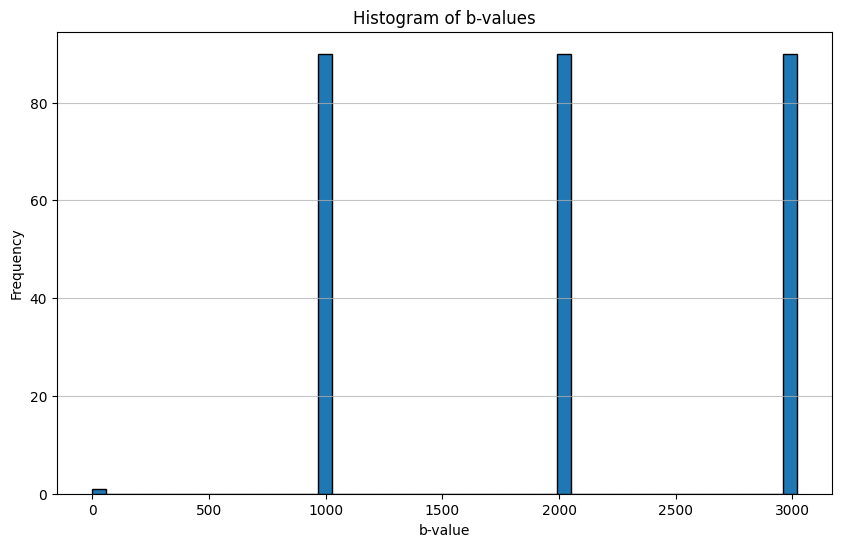

In [57]:
# prompt: create histogram for different b_value in b_table_df

plt.figure(figsize=(10, 6))
plt.hist(b_table_df['b_value'], bins=50, edgecolor='black') # Adjust bins as needed
plt.xlabel("b-value")
plt.ylabel("Frequency")
plt.title("Histogram of b-values")
plt.grid(axis='y', alpha=0.75)
plt.show()

# You can also create histograms for the components of the b-vectors if needed
# plt.figure(figsize=(15, 5))
# plt.subplot(1, 3, 1)
# plt.hist(b_table_df['b_vector_x'], bins=50, edgecolor='black')
# plt.title("Histogram of b_vector_x")

# plt.subplot(1, 3, 2)
# plt.hist(b_table_df['b_vector_y'], bins=50, edgecolor='black')
# plt.title("Histogram of b_vector_y")

# plt.subplot(1, 3, 3)
# plt.hist(b_table_df['b_vector_z'], bins=50, edgecolor='black')
# plt.title("Histogram of b_vector_z")

# plt.tight_layout()
# plt.show()

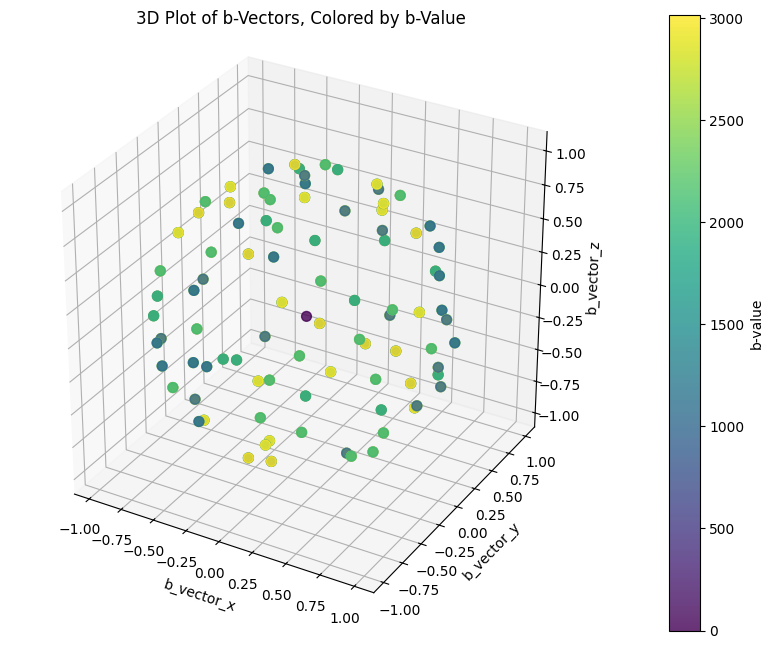

No b-vectors found for b-value 1000.
No b-vectors found for b-value 2000.
No b-vectors found for b-value 3000.


In [58]:
# prompt: plot the x, y z vectors from b_table_df

# Get the x, y, and z vectors from the DataFrame
x_vectors = b_table_df['b_vector_x'].values
y_vectors = b_table_df['b_vector_y'].values
z_vectors = b_table_df['b_vector_z'].values

# Get the b-values to color the points
b_values = b_table_df['b_value'].values

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the vectors, colored by b-value
# Using `c=b_values` will color points based on their b-value
# Using a colormap like 'viridis' or 'plasma' works well
# Add a colorbar to understand the mapping of color to b-value
scatter = ax.scatter(x_vectors, y_vectors, z_vectors, c=b_values, cmap='viridis', s=50, alpha=0.8)

# Add labels and title
ax.set_xlabel('b_vector_x')
ax.set_ylabel('b_vector_y')
ax.set_zlabel('b_vector_z')
ax.set_title('3D Plot of b-Vectors, Colored by b-Value')

# Add a colorbar
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('b-value')

# Set equal aspect ratio to make the sphere look spherical
# This is important as b-vectors are typically on shells (spheres)
ax.set_box_aspect([np.ptp(x_vectors), np.ptp(y_vectors), np.ptp(z_vectors)])

plt.show()

# Optional: Plot vectors for specific b-shells separately
# Example: Plot vectors for b-value 1000
b1000_df = b_table_df[b_table_df['b_value'] == 1000]

if not b1000_df.empty:
    fig_b1000 = plt.figure(figsize=(8, 8))
    ax_b1000 = fig_b1000.add_subplot(111, projection='3d')

    ax_b1000.scatter(b1000_df['b_vector_x'], b1000_df['b_vector_y'], b1000_df['b_vector_z'], s=50, c='blue', alpha=0.8)

    ax_b1000.set_xlabel('b_vector_x')
    ax_b1000.set_ylabel('b_vector_y')
    ax_b1000.set_zlabel('b_vector_z')
    ax_b1000.set_title('b-Vectors for b-value 1000')
    ax_b1000.set_box_aspect([1,1,1]) # Assuming unit vectors on a sphere
    ax_b1000.set_xlim([-1.1, 1.1]) # Set limits appropriate for unit vectors
    ax_b1000.set_ylim([-1.1, 1.1])
    ax_b1000.set_zlim([-1.1, 1.1])
    plt.show()
else:
    print("No b-vectors found for b-value 1000.")

# Example: Plot vectors for b-value 2000
b2000_df = b_table_df[b_table_df['b_value'] == 2000]
if not b2000_df.empty:
    fig_b2000 = plt.figure(figsize=(8, 8))
    ax_b2000 = fig_b2000.add_subplot(111, projection='3d')
    ax_b2000.scatter(b2000_df['b_vector_x'], b2000_df['b_vector_y'], b2000_df['b_vector_z'], s=50, c='green', alpha=0.8)
    ax_b2000.set_xlabel('b_vector_x')
    ax_b2000.set_ylabel('b_vector_y')
    ax_b2000.set_zlabel('b_vector_z')
    ax_b2000.set_title('b-Vectors for b-value 2000')
    ax_b2000.set_box_aspect([1,1,1])
    ax_b2000.set_xlim([-1.1, 1.1])
    ax_b2000.set_ylim([-1.1, 1.1])
    ax_b2000.set_zlim([-1.1, 1.1])
    plt.show()
else:
     print("No b-vectors found for b-value 2000.")


# Example: Plot vectors for b-value 3000
b3000_df = b_table_df[b_table_df['b_value'] == 3000]
if not b3000_df.empty:
    fig_b3000 = plt.figure(figsize=(8, 8))
    ax_b3000 = fig_b3000.add_subplot(111, projection='3d')
    ax_b3000.scatter(b3000_df['b_vector_x'], b3000_df['b_vector_y'], b3000_df['b_vector_z'], s=50, c='red', alpha=0.8)
    ax_b3000.set_xlabel('b_vector_x')
    ax_b3000.set_ylabel('b_vector_y')
    ax_b3000.set_zlabel('b_vector_z')
    ax_b3000.set_title('b-Vectors for b-value 3000')
    ax_b3000.set_box_aspect([1,1,1])
    ax_b3000.set_xlim([-1.1, 1.1])
    ax_b3000.set_ylim([-1.1, 1.1])
    ax_b3000.set_zlim([-1.1, 1.1])
    plt.show()
else:
     print("No b-vectors found for b-value 3000.")

In [ ]:
# prompt: visualize the x, y z vectors from b_table_df in an interactive sphere surface

!pip install plotly cufflinks
import plotly.graph_objects as go
import plotly.express as px

# Extract the x, y, and z coordinates and b-values from the DataFrame
x = b_table_df['b_vector_x']
y = b_table_df['b_vector_y']
z = b_table_df['b_vector_z']
b_values = b_table_df['b_value']

# Create the interactive scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=5,
        color=b_values, # Color points by b-value
        colorscale='Viridis', # Choose a colorscale
        opacity=0.8
    )
)])

# Add a layout
fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=0),
    title='Interactive 3D Plot of b-Vectors (Diffusion Gradients)',
    scene=dict(
        xaxis_title='b_vector_x',
        yaxis_title='b_vector_y',
        zaxis_title='b_vector_z',
        aspectmode='cube' # Maintain equal aspect ratio
    )
)

# Show the plot
fig.show()

# Optional: Plot a unit sphere surface for context
fig_sphere = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=5,
        color=b_values,
        colorscale='Viridis',
        opacity=0.8
    )
)])

# Add a sphere surface
# Create sphere coordinates
u, v = np.mgrid[0:2*np.pi:60j, 0:np.pi:30j]
xs = np.cos(u) * np.sin(v)
ys = np.sin(u) * np.sin(v)
zs = np.cos(v)

fig_sphere.add_trace(go.Surface(
    x=xs, y=ys, z=zs,
    colorscale=[[0, 'lightgray'], [1, 'lightgray']], # Single color for surface
    opacity=0.1,
    showscale=False # Hide color scale for the surface
))


fig_sphere.update_layout(
    margin=dict(l=0, r=0, b=0, t=0),
    title='Interactive 3D Plot of b-Vectors with Unit Sphere',
    scene=dict(
        xaxis_title='b_vector_x',
        yaxis_title='b_vector_y',
        zaxis_title='b_vector_z',
        aspectmode='cube' # Maintain equal aspect ratio
    )
)

fig_sphere.show()

In [94]:
# prompt: create a data frame with only ndir and directions from voxt array

voxt = mat_contents['voxt']

# Extract 'ndir' and 'directions' from the structured numpy array
ndir_array = voxt['ndir']
directions_array = voxt['directions']

# Create a list of dictionaries for the DataFrame
data_list = []
for i in range(len(voxt)):
    num_fibers = ndir_array[i][0][0] # Extract scalar value
    fiber_directions = directions_array[i][0] # This is an array (N_actual_fibers, 3)

    # Store the number of directions and the directions array for each voxel
    data_list.append({
        'ndir': num_fibers,
        'directions': fiber_directions
    })

# Create the pandas DataFrame
df_voxt = pd.DataFrame(data_list)

# Display the first few rows of the DataFrame
print("DataFrame created from voxt:")
print(df_voxt.head())

# Display info about the DataFrame
print("\nDataFrame Info:")
df_voxt.info()

# Display descriptive statistics for 'ndir'
print("\nDataFrame Description ('ndir' only):")
print(df_voxt['ndir'].describe())

# Example: Accessing data for a specific voxel (e.g., row 0)
first_voxel_ndir = df_voxt.loc[0, 'ndir']
first_voxel_directions = df_voxt.loc[0, 'directions']

print(f"\nData for the first voxel:")
print(f"  Number of directions (ndir): {first_voxel_ndir}")
print(f"  Fiber directions: {first_voxel_directions}")

# Example: Accessing data for a voxel with multiple fibers (find one where ndir > 1)
multi_fiber_voxels = df_voxt[df_voxt['ndir'] > 1]

if not multi_fiber_voxels.empty:
    sample_idx = multi_fiber_voxels.index[0] # Get the index of the first such voxel
    sample_ndir = df_voxt.loc[sample_idx, 'ndir']
    sample_directions = df_voxt.loc[sample_idx, 'directions']

    print(f"\nData for a voxel with multiple fibers (index {sample_idx}):")
    print(f"  Number of directions (ndir): {sample_ndir}")
    print(f"  Fiber directions: \n{sample_directions}")
else:
    print("\nNo voxels with more than 1 fiber found in the first few entries.")



DataFrame created from voxt:
  ndir                                         directions
0  [3]  [[1.093523101619975, -1.0712505488597581], [1....

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ndir        1 non-null      object
 1   directions  1 non-null      object
dtypes: object(2)
memory usage: 148.0+ bytes

DataFrame Description ('ndir' only):
count       1
unique      1
top       [3]
freq        1
Name: ndir, dtype: object

Data for the first voxel:
  Number of directions (ndir): [3]
  Fiber directions: [[ 1.0935231  -1.07125055]
 [ 1.78944789 -1.058382  ]
 [-0.46716807  0.00282574]]

Data for a voxel with multiple fibers (index 0):
  Number of directions (ndir): [3]
  Fiber directions: 
[[ 1.0935231  -1.07125055]
 [ 1.78944789 -1.058382  ]
 [-0.46716807  0.00282574]]


In [59]:
mat_contents['dwi'].shape

(100000, 271)

In [60]:
mat_contents['dwi']


array([[1.        , 0.38415341, 0.41852097, ..., 0.21986342, 0.31950491,
        0.08279145],
       [1.        , 0.39577771, 0.38460565, ..., 0.17950288, 0.09543498,
        0.06058017],
       [1.        , 0.48684794, 0.39555855, ..., 0.09485457, 0.05135589,
        0.28620099],
       ...,
       [1.        , 0.56734501, 0.32174614, ..., 0.19593223, 0.39076057,
        0.06062001],
       [1.        , 0.41409458, 0.38362504, ..., 0.08947313, 0.07683212,
        0.04533967],
       [1.        , 0.50899736, 0.31319543, ..., 0.02330286, 0.21763523,
        0.0196599 ]])

In [61]:
# prompt: create a series of token for the transformer X = [ [x₁, y₁, z₁, dwi₁], ..., [xₙ, yₙ, zₙ, dwiₙ] ]

def create_transformer_tokens(dwi_data, b_table_data):
    """
    Creates tokens for a transformer model from DWI and b-table data.

    Each token represents a sampling point (direction + b-value) and includes
    the corresponding DWI signal.

    Args:
        dwi_data (np.ndarray): DWI signal data (N_voxels, N_directions).
        b_table_data (np.ndarray): b-table data (4, N_directions), where
                                   row 0 is b-values, rows 1-3 are b-vectors (x, y, z).

    Returns:
        torch.Tensor: Tensor of tokens (N_voxels, N_directions, 5).
                      Each token is [b_vector_x, b_vector_y, b_vector_z, b_value, dwi_signal].
                      Returns None if data shapes are incompatible.
    """
    N_voxels, N_directions_dwi = dwi_data.shape
    N_rows_btable, N_directions_btable = b_table_data.shape

    if N_directions_dwi != N_directions_btable:
        print(f"Error: Number of directions in DWI ({N_directions_dwi}) "
              f"and b-table ({N_directions_btable}) do not match.")
        return None

    # Extract b-values and b-vectors from the b-table
    b_values = b_table_data[0, :]      # shape (N_directions,)
    b_vectors = b_table_data[1:4, :].T # shape (N_directions, 3)

    # Expand b-values and b-vectors to match the number of voxels
    # Resulting shapes: (N_voxels, N_directions, 3) and (N_voxels, N_directions)
    b_vectors_expanded = np.tile(b_vectors[np.newaxis, :, :], (N_voxels, 1, 1))
    b_values_expanded = np.tile(b_values[np.newaxis, :], (N_voxels, 1))[:, :, np.newaxis] # Add dimension for concatenation

    # Expand DWI data to have an extra dimension for concatenation
    dwi_data_expanded = dwi_data[:, :, np.newaxis] # shape (N_voxels, N_directions, 1)

    # Concatenate the features to create tokens
    # Token structure: [b_vector_x, b_vector_y, b_vector_z, b_value, dwi_signal]
    tokens_np = np.concatenate([b_vectors_expanded, b_values_expanded, dwi_data_expanded], axis=-1) # shape (N_voxels, N_directions, 5)

    # Convert to PyTorch Tensor
    tokens_tensor = torch.tensor(tokens_np, dtype=torch.float32)

    return tokens_tensor

# Example usage with your loaded data:
# Assuming mat_contents['dwi'] and mat_contents['b_table'] are already loaded
dwi_data = mat_contents['dwi']
b_table_data = mat_contents['b_table']

transformer_tokens = create_transformer_tokens(dwi_data, b_table_data)

if transformer_tokens is not None:
    print("\nCreated Transformer Tokens:")
    print("Shape:", transformer_tokens.shape)
    print("Example token for the first voxel, first direction:", transformer_tokens[0, 0, :])
    print("Example token for the first voxel, last direction:", transformer_tokens[0, -1, :])
    print("Example token for the last voxel, first direction:", transformer_tokens[-1, 0, :])




Created Transformer Tokens:
Shape: torch.Size([100000, 271, 5])
Example token for the first voxel, first direction: tensor([0., 0., 0., 0., 1.])
Example token for the first voxel, last direction: tensor([ 7.2665e-01, -5.9576e-01,  3.4213e-01,  3.0181e+03,  8.2791e-02])
Example token for the last voxel, first direction: tensor([0., 0., 0., 0., 1.])


In [65]:

def create_transformer_tokens(dwi_data, b_table_data):
    """
    Creates tokens for a transformer model from DWI and b-table data.

    Each token represents a sampling point (direction + b-value) and includes
    the corresponding DWI signal.

    Args:
        dwi_data (np.ndarray): DWI signal data (N_voxels, N_directions).
        b_table_data (np.ndarray): b-table data (4, N_directions), where
                                   row 0 is b-values, rows 1-3 are b-vectors (x, y, z).

    Returns:
        torch.Tensor: Tensor of tokens (N_voxels, N_directions, 5).
                      Each token is [b_vector_x, b_vector_y, b_vector_z, b_value, dwi_signal].
                      Returns None if data shapes are incompatible.
    """
    N_voxels, N_directions_dwi = dwi_data.shape
    N_rows_btable, N_directions_btable = b_table_data.shape

    if N_directions_dwi != N_directions_btable:
        print(f"Error: Number of directions in DWI ({N_directions_dwi}) "
              f"and b-table ({N_directions_btable}) do not match.")
        return None

    # Extract b-values and b-vectors from the b-table
    #b_values = b_table_data[0, :]      # shape (N_directions,)
    b_vectors = b_table_data[1:4, :].T # shape (N_directions, 3)

    # Expand b-values and b-vectors to match the number of voxels
    # Resulting shapes: (N_voxels, N_directions, 3) and (N_voxels, N_directions)
    b_vectors_expanded = np.tile(b_vectors[np.newaxis, :, :], (N_voxels, 1, 1))
    #b_values_expanded = np.tile(b_values[np.newaxis, :], (N_voxels, 1))[:, :, np.newaxis] # Add dimension for concatenation

    # Expand DWI data to have an extra dimension for concatenation
    dwi_data_expanded = dwi_data[:, :, np.newaxis] # shape (N_voxels, N_directions, 1)

    # Concatenate the features to create tokens
    # Token structure: [b_vector_x, b_vector_y, b_vector_z, b_value, dwi_signal]
    tokens_np = np.concatenate([b_vectors_expanded, dwi_data_expanded], axis=-1) # shape (N_voxels, N_directions, 5)

    # Convert to PyTorch Tensor
    tokens_tensor = torch.tensor(tokens_np, dtype=torch.float32)

    return tokens_tensor

# Example usage with your loaded data:
# Assuming mat_contents['dwi'] and mat_contents['b_table'] are already loaded
dwi_data = mat_contents['dwi']
b_table_data = mat_contents['b_table']

transformer_tokens = create_transformer_tokens(dwi_data, b_table_data)

if transformer_tokens is not None:
    print("\nCreated Transformer Tokens:")
    print("Shape:", transformer_tokens.shape)
    print("Example token for the first voxel, first direction:", transformer_tokens[0, 0, :])
    print("Example token for the first voxel, last direction:", transformer_tokens[0, -1, :])
    print("Example token for the last voxel, first direction:", transformer_tokens[-1, 0, :])




Created Transformer Tokens:
Shape: torch.Size([100000, 271, 4])
Example token for the first voxel, first direction: tensor([0., 0., 0., 1.])
Example token for the first voxel, last direction: tensor([ 0.7267, -0.5958,  0.3421,  0.0828])
Example token for the last voxel, first direction: tensor([0., 0., 0., 1.])


In [66]:
class DWIToFiberTransformer(nn.Module):
    def __init__(self, d_model=64, nhead=4, num_layers=4):
        super().__init__()
        self.input_proj = nn.Linear(4, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True)
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.output = nn.Linear(d_model, 3)

    def forward(self, x):  # x shape: (B, N, 4)
        x = self.input_proj(x)
        x = self.encoder(x)
        x = x.mean(dim=1)  # global pooling
        x = self.output(x)
        return nn.functional.normalize(x, dim=-1)  # unit vector

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np

# === 1. Simulate b_table and dwi data for training ===
def simulate_btable_and_dwi(n_voxels=100, n_dirs=271):
    bvecs = np.random.randn(n_dirs, 3)
    bvecs = bvecs / np.linalg.norm(bvecs, axis=1, keepdims=True)  # normalize directions

    dwi = []
    gt_dirs = []

    for _ in range(n_voxels):
        # Random dominant fiber direction
        gt = np.random.randn(3)
        gt = gt / np.linalg.norm(gt)
        gt_dirs.append(gt)

        # Simulate signal: lower when aligned with fiber direction
        cos_angles = np.dot(bvecs, gt)
        signal = np.exp(-2 * cos_angles**2)  # synthetic attenuation pattern
        dwi.append(signal)

    return np.array(bvecs), np.array(dwi), np.array(gt_dirs)


# === 2. Dataset Class ===
class DWIFiberDataset(Dataset):
    def __init__(self, bvecs, dwi, gt_dirs):
        self.bvecs = bvecs
        self.dwi = dwi
        self.gt_dirs = gt_dirs

    def __len__(self):
        return len(self.dwi)

    def __getitem__(self, idx):
        bvec_input = self.bvecs  # shape: (N, 3)
        dwi_input = self.dwi[idx][:, None]  # shape: (N, 1)
        x = np.concatenate([bvec_input, dwi_input], axis=1).astype(np.float32)  # (N, 4)
        y = self.gt_dirs[idx].astype(np.float32)  # (3,)
        return torch.tensor(x), torch.tensor(y)


# === 3. Transformer Model ===
class DWIToFiberTransformer(nn.Module):
    def __init__(self, d_model=64, nhead=4, num_layers=3):
        super().__init__()
        self.input_proj = nn.Linear(4, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True)
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.output = nn.Linear(d_model, 3)

    def forward(self, x):
        x = self.input_proj(x)
        x = self.encoder(x)
        x = x.mean(dim=1)
        x = self.output(x)
        return nn.functional.normalize(x, dim=-1)


# === 4. Angular Loss ===
def angular_loss(pred, target):
    pred = nn.functional.normalize(pred, dim=-1)
    target = nn.functional.normalize(target, dim=-1)
    dot = (pred * target).sum(dim=-1).clamp(-1.0, 1.0)
    angle = torch.acos(torch.abs(dot))
    return angle.mean()


# === 5. Simulate + Train One Step ===
bvecs, dwi, gt_dirs = simulate_btable_and_dwi(n_voxels=128)
dataset = DWIFiberDataset(bvecs, dwi, gt_dirs)
loader = DataLoader(dataset, batch_size=8, shuffle=True)

model = DWIToFiberTransformer()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Train 1 batch for demo
X_batch, Y_batch = next(iter(loader))
pred = model(X_batch)
loss = angular_loss(pred, Y_batch)

optimizer.zero_grad()
loss.backward()
optimizer.step()

# Output for comparison
import pandas as pd
import ace_tools as tools
tools.display_dataframe_to_user(name="Transformer Prediction vs Ground Truth", dataframe=pd.DataFrame({
    "Predicted Direction": pred[0].detach().numpy(),
    "Ground Truth Direction": Y_batch[0].numpy()
}))


In [85]:
mat_contents['voxt'].shape

(1, 100000)

In [96]:
mat_contents['voxt']['directions']

array([[array([[ 1.0935231 , -1.07125055],
               [ 1.78944789, -1.058382  ],
               [-0.46716807,  0.00282574]]),
        array([[-2.70267893, -0.82551973]]),
        array([[-1.28464016,  0.10745115],
               [ 0.81344624,  0.65990955]]), ...,
        array([[-0.60292788,  1.34531679]]),
        array([[ 0.17639295, -0.12491789],
               [ 1.9293584 , -0.06079207]]),
        array([[ 2.40003816,  0.29089578],
               [ 1.91539391, -0.09578257]])]], dtype=object)

In [86]:
mat_contents['voxt'][0][0][0]

array([[3]], dtype=uint8)

In [87]:
mat_contents['voxt'][0][0][1]

array([[ 1.0935231 , -1.07125055],
       [ 1.78944789, -1.058382  ],
       [-0.46716807,  0.00282574]])

In [89]:
mat_contents['voxt'][0][1][0]

array([[1]], dtype=uint8)

In [90]:
mat_contents['voxt'][0][1][1]

array([[-2.70267893, -0.82551973]])

In [92]:
mat_contents['voxt'][0][99999][0]

array([[2]], dtype=uint8)

In [93]:
mat_contents['voxt'][0][99999][1]

array([[ 2.40003816,  0.29089578],
       [ 1.91539391, -0.09578257]])

In [103]:
mat_contents['voxt'][0][3][1]

array([[ 0.78556028, -1.2172544 ]])

In [104]:
mat_contents['voxt'][0][3][1][0]

array([ 0.78556028, -1.2172544 ])

In [99]:
mat_contents['voxt'][0][99999][1][0]

array([2.40003816, 0.29089578])

In [100]:
mat_contents['voxt'][0][99999][1][0][0]

np.float64(2.400038158265149)

In [101]:
mat_contents['voxt'][0][99999][1][0][1]

np.float64(0.2908957845055715)

In [121]:
len(mat_contents['voxt']['directions'])

1

In [132]:
true_directions = []

for i in range(100000):
    el, az = mat_contents['voxt'][0][i][1][0][0], mat_contents['voxt'][0][i][1][0][1]
    x = cos(el) * sin(az)
    y = sin(el) * sin(az)
    z = sin(el)
    true_directions.append([x, y, z])

In [135]:
len(true_directions)

100000

In [138]:
true_directions[0]

[-0.40322528666995094, -0.7797067553162289, 0.8882507915144634]

In [139]:
transformer_tokens.shape

torch.Size([100000, 271, 4])

In [141]:
# Assume true_directions and transformer_tokens are already defined as:
# - true_directions: list of [x, y, z] vectors (length 100000)
# - transformer_tokens: torch.Tensor of shape (100000, 271, 4 or 5)

import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd # Import pandas if not already imported
from IPython.display import display # Import display if not already imported

# Convert true_directions to tensor
gt_dirs_tensor = torch.tensor(true_directions, dtype=torch.float32)

# Prepare Dataset
dataset = TensorDataset(transformer_tokens, gt_dirs_tensor)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Define Transformer model
class FiberTransformer(nn.Module):
    def __init__(self, input_dim=5, d_model=64, nhead=4, num_layers=2):
        super().__init__()
        self.input_proj = nn.Linear(input_dim, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model, nhead, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers)
        self.out_proj = nn.Linear(d_model, 3)

    def forward(self, x):
        x = self.input_proj(x)
        x = self.transformer(x)
        x = x.mean(dim=1)
        return F.normalize(self.out_proj(x), dim=-1)

# Angular loss function
def angular_loss(pred, target):
    pred = F.normalize(pred, dim=-1)
    target = F.normalize(target, dim=-1)
    dot = (pred * target).sum(dim=-1).clamp(-1.0, 1.0)
    return torch.acos(dot.abs()).mean()

# Initialize model and optimizer
# Get the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_dim = transformer_tokens.shape[-1]
model = FiberTransformer(input_dim=input_dim).to(device) # Move model to device
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Run one training step and return output for inspection
# Move data batch to the device
x_batch, y_batch = next(iter(dataloader))
x_batch = x_batch.to(device)
y_batch = y_batch.to(device)

output = model(x_batch)
loss = angular_loss(output, y_batch)
optimizer.zero_grad()
loss.backward()
optimizer.step()

# Replace ace_tools display with standard pandas/IPython display
result_df = pd.DataFrame({
    "Predicted Direction": output[0].detach().cpu().numpy(), # Move tensor back to CPU for numpy conversion
    "True Direction": y_batch[0].detach().cpu().numpy() # Move tensor back to CPU for numpy conversion
})
print("Transformer Prediction Sample:")
display(result_df)

Transformer Prediction Sample:


,Predicted Direction,True Direction
0,-0.946759,-0.170661
1,-0.095074,0.171168
2,-0.307583,0.708155
